# 加载数据

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [11]:
# 设置随机种子
SEED=222
np.random.seed(seed)

In [12]:
df=pd.read_csv('files/data/Python88/input.csv')

In [17]:
def get_train_test(test_size=0.95):

    y = 1 * (df.cand_pty_affiliation == "REP")

    X = df.drop(["cand_pty_affiliation"], axis=1)

    X = pd.get_dummies(X, sparse=True)

    X.drop(X.columns[X.std() == 0], axis=1, inplace=True)

    return train_test_split(X, y, test_size=test_size, random_state=SEED)

X_train, X_test, y_train, y_test = get_train_test()
print("\nExample data:")

df.head()



Example data:


,cand_pty_affiliation,cand_office_st,cand_office,cand_status,rpt_tp,transaction_tp,entity_tp,state,classification,cycle,transaction_amt
0,REP,US,P,C,Q3,15,IND,NY,Engineer,2016.0,500.0
1,DEM,US,P,C,M5,15E,IND,OR,Math-Stat,2016.0,50.0
2,DEM,US,P,C,M3,15,IND,TX,Scientist,2008.0,250.0
3,DEM,US,P,C,Q2,15E,IND,IN,Math-Stat,2016.0,250.0
4,REP,US,P,C,12G,15,IND,MA,Engineer,2016.0,184.0


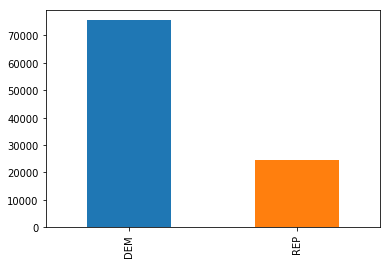

In [23]:
%matplotlib inline
df['cand_pty_affiliation'].value_counts().plot(kind='bar')

从上图可以看出，75% 的捐款是给民主党的

我们使用 ROC-AUC 来评估模型性能。如果你之前没用过该指标，随机猜测可以是 0.5 分，完美的召回率和精确率是 1.0。

## 模型集成

想象一下你在玩常识问答游戏。一个人玩时，可能会有一些题你完全不了解。如果我们想获得高分，就需要组建一个团队来覆盖所有相关主题。这就是集成的基本概念：结合多个模型的预测，对特异性误差取平均，从而获得更好的整体预测结果。

一个重要问题是如何结合预测。以常识问答游戏为例，我们很容易想象到团队成员可能会使用多数投票的方式确定选择哪个答案。机器学习的分类问题也是一样：作出最常见的类别标签预测相当于多数投票规则。但是也有很多其他方式可以结合预测，通常我们会使用一个模型来学习如何最好地结合预测结果。

https://www.jiqizhixin.com/articles/2018-01-14-8

## 决策树

我们用一个简单的可解释性模型来解释集成：使用 if-then 规则的决策树。决策树越深，可以捕捉的模式就越复杂，不过也更有可能出现过拟合。因此，我们需要另一种方式来构建决策树的复杂模型，而不同决策树的集成就是这样一种方式。

In [30]:
import pydotplus
from IPython.display import Image
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier,export_graphviz
def print_graph(clf, feature_names):

    """Print decision tree."""

    graph = export_graphviz(

        clf,

        label="root",

        proportion=True,

        impurity=False, 

        out_file=None, 

        feature_names=feature_names,

        class_names={0: "D", 1: "R"},

        filled=True,

        rounded=True

    )

    graph = pydotplus.graph_from_dot_data(graph)  

    return Image(graph.create_png())

In [31]:
t1 = DecisionTreeClassifier(max_depth=1, random_state=SEED)

t1.fit(X_train, y_train)

p = t1.predict_proba(X_test)[:, 1]


print("Decision tree ROC-AUC score: %.3f" % roc_auc_score(y_test, p))

print_graph(t1, X_train.columns)

Decision tree ROC-AUC score: 0.672


InvocationException: GraphViz's executables not found